# **LSTM**

In [ ]:
# Importing necessary libraries

import math                    # Provides access to mathematical functions (e.g., trigonometry, logarithms, etc.)
import random                  # For generating random numbers and making random selections
import datetime as dt          # To work with date and time objects, aliased as 'dt' for convenience
import numpy as np             # NumPy for working with arrays and numerical computations
import pandas as pd            # Pandas for data manipulation and analysis (mainly working with DataFrames)
import matplotlib.dates as mdates  # Helper functions to handle dates with Matplotlib
import matplotlib.pyplot as plt  # Pyplot from Matplotlib for creating static, animated, and interactive visualizations

In [ ]:
# Importing the drive module from Google Colab to access Google Drive

from google.colab import drive  # Allows you to access files from your Google Drive in Google Colab

# Mounting Google Drive to Colab's file system
# This command prompts you to authorize Colab to access your Google Drive, enabling you to read and write files.

drive.mount('/content/drive')  # Mounts your Google Drive to the /content/drive directory in the Colab environment

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading a CSV file from Google Drive into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/Dataset/HPQ.csv')
# 'df' is a Pandas DataFrame that stores the content of the CSV file.
# The file is located in the 'MyDrive/Dataset' folder on your Google Drive, and the file name is 'HPQ.csv'.
# 'pd.read_csv()' reads the CSV file and converts it into a structured DataFrame for data manipulation and analysis.

In [ ]:
# Displaying the first few rows of the DataFrame

df.head()
# This command shows the first 5 rows (by default) of the DataFrame 'df'.
# It's useful for quickly inspecting the structure and contents of the dataset.
# You can pass a number as an argument (e.g., df.head(10)) to view more rows.

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.131273,0.131273,0.124177,0.124177,0.006887,2480300
1,1962-01-03,0.124177,0.124177,0.121516,0.122846,0.006813,507300
2,1962-01-04,0.122846,0.126838,0.117968,0.120185,0.006666,845500
3,1962-01-05,0.119742,0.119742,0.117525,0.117525,0.006518,338200
4,1962-01-08,0.117525,0.119299,0.115307,0.119299,0.006617,873700


In [ ]:
# Converting the 'Date' column in the DataFrame to datetime format

df['Date'] = pd.to_datetime(df['Date'])
# This converts the values in the 'Date' column of the DataFrame 'df' from string/object type to Pandas' datetime format.
# This is essential for performing time-based operations (e.g., sorting, filtering, plotting) on the 'Date' column.

In [ ]:
# Defining the start and end dates for filtering the DataFrame
start_date = '2008-01-01'  # Start date for the date range (January 1, 2008)
end_date = '2020-04-01'    # End date for the date range (April 1, 2020)

# Slicing the DataFrame based on the date range
sliced_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
# This creates a new DataFrame 'sliced_df' that contains rows where the 'Date' column is within the specified range.
# The logical condition filters rows where 'Date' is greater than or equal to 'start_date' and less than or equal to 'end_date'.

# Displaying the filtered DataFrame
sliced_df
# Displays the sliced DataFrame containing only the data within the specified date range.

,Date,Open,High,Low,Close,Adj Close,Volume
11579,2008-01-02,22.924614,23.151680,22.361490,22.547684,14.702811,30826200
11580,2008-01-03,22.461399,22.629427,22.288828,22.547684,14.702811,23538200
11581,2008-01-04,22.161671,22.338783,21.144415,21.285194,13.879572,54436900
11582,2008-01-07,21.371481,21.412352,20.077202,20.594913,13.429456,69337000
11583,2008-01-08,20.667576,20.899183,19.536785,19.613987,12.789815,94068300
...,...,...,...,...,...,...,...
14658,2020-03-26,15.530000,18.209999,15.310000,17.940001,17.940001,20615300
14659,2020-03-27,17.000000,17.309999,16.120001,16.860001,16.860001,11273200
14660,2020-03-30,16.930000,18.090000,16.549999,17.840000,17.840000,11892700
14661,2020-03-31,17.840000,17.969999,16.930000,17.360001,17.360001,16771900


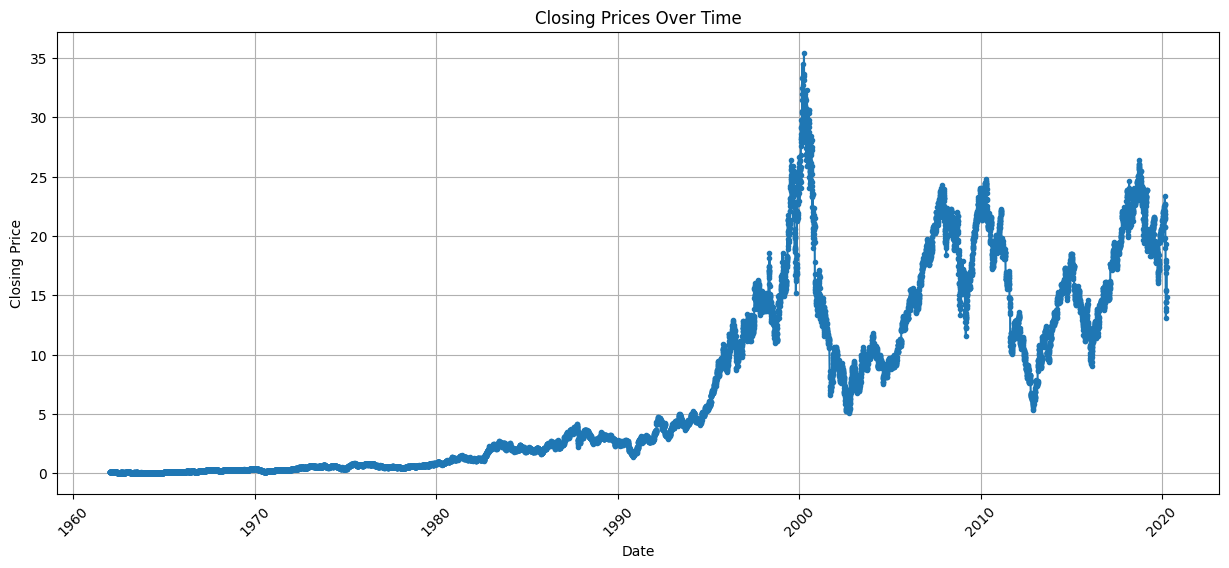

In [ ]:
# Creating a plot to visualize the closing prices over time

plt.figure(figsize=(15,6))
# Initializes a new figure with a custom size of 15 inches in width and 6 inches in height, providing ample space for the plot.

plt.plot(df['Date'], df['Close'], marker='.')
# Plots the 'Date' column on the x-axis and the 'Close' column (closing prices) on the y-axis.
# The 'marker=.' argument adds a small dot for each data point, making it easier to visualize individual points on the line.

plt.title('Closing Prices Over Time')
# Adds a title to the plot to describe what the visualization represents.

plt.xlabel('Date')
# Adds a label to the x-axis to indicate that it represents dates.

plt.ylabel('Closing Price')
# Adds a label to the y-axis to indicate that it represents the closing stock prices.

plt.xticks(rotation=45)
# Rotates the x-axis tick labels by 45 degrees for better readability, especially for date labels.

plt.grid(True)
# Adds a grid to the plot, making it easier to interpret the data by aligning with the values on the x and y axes.

plt.show()
# Displays the plot with all the customizations applied.

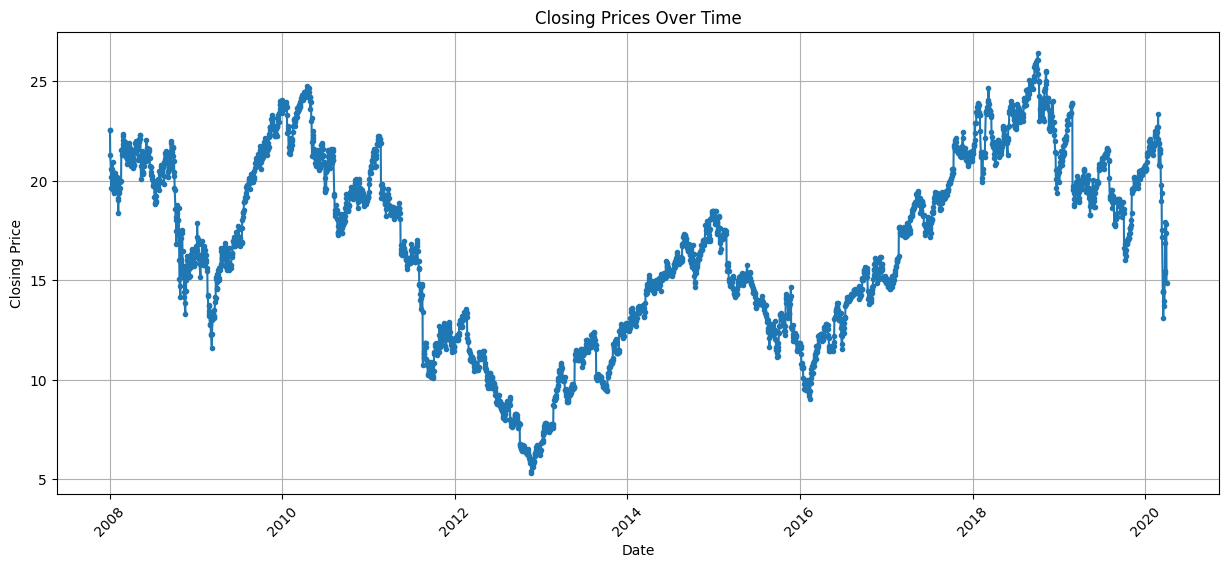

In [ ]:
# Creating a plot to visualize the closing prices over the specified time range

plt.figure(figsize=(15,6))
# Initializes a new figure with a custom size of 15 inches by 6 inches, providing ample space for the plot.

plt.plot(sliced_df['Date'], sliced_df['Close'], marker='.')
# Plots the 'Date' column from the sliced DataFrame (filtered date range) on the x-axis and the 'Close' column (closing prices) on the y-axis.
# The 'marker=.' adds a dot at each data point to make it easier to see individual points.

plt.title('Closing Prices Over Time')
# Sets the title for the plot, indicating that it shows closing prices over the specified time period.

plt.xlabel('Date')
# Labels the x-axis as 'Date' to clarify that it represents dates.

plt.ylabel('Closing Price')
# Labels the y-axis as 'Closing Price', indicating that it represents the stock's closing prices.

plt.xticks(rotation=45)
# Rotates the x-axis tick labels by 45 degrees to improve readability, particularly for dates.

plt.grid(True)
# Adds a grid to the plot to make it easier to track the values on the x and y axes.

plt.show()
# Displays the plot with all customizations.

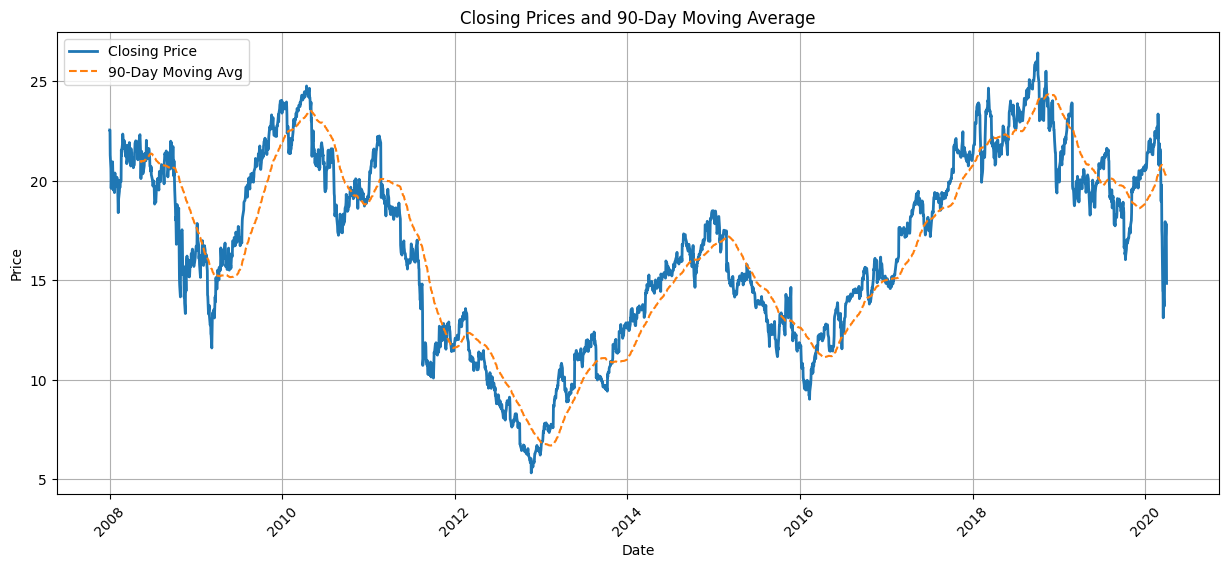

In [ ]:
# Setting a window size for the moving average
window = 90
# Defines the window size as 90 days for calculating the moving average.

plt.figure(figsize=(15,6))
# Initializes a new figure with a size of 15x6 inches for the plot.

# Plotting the actual closing prices
plt.plot(sliced_df['Date'], sliced_df['Close'], label='Closing Price', linewidth=2)
# Plots the 'Date' column on the x-axis and 'Close' (closing prices) on the y-axis from the sliced DataFrame.
# The 'label' is used to indicate that this line represents the closing prices.
# 'linewidth=2' makes the line thicker and more visible.

# Plotting the 90-day moving average
plt.plot(sliced_df['Date'], sliced_df['Close'].rolling(window=window).mean(),
         label=f'{window}-Day Moving Avg', linestyle='--')
# Plots the moving average of the 'Close' column over a rolling window of 90 days (or the value of 'window').
# 'rolling(window=window).mean()' calculates the moving average.
# The 'label' provides the name of the moving average in the legend, and 'linestyle' sets it to a dashed line ('--').

# Adding a title to the plot
plt.title(f'Closing Prices and {window}-Day Moving Average')
# The title dynamically includes the value of the window (e.g., "90-Day Moving Average").

# Labeling the x and y axes
plt.xlabel('Date')
# Adds a label to the x-axis indicating the dates.

plt.ylabel('Price')
# Adds a label to the y-axis indicating the prices (closing prices or moving average).

# Rotating x-axis labels for readability
plt.xticks(rotation=45)
# Rotates the x-axis tick labels by 45 degrees for better readability.

# Adding a legend to differentiate between closing prices and the moving average
plt.legend()
# Displays a legend showing the labels for both the closing price line and the moving average line.

# Adding grid lines to the plot for better readability
plt.grid(True)
# Adds grid lines to the plot, making it easier to track data points with respect to both axes.

# Displaying the final plot
plt.show()
# Shows the plot with all customizations.

<ipython-input-56-c392bc8403eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['Month'] = sliced_df['Date'].dt.month


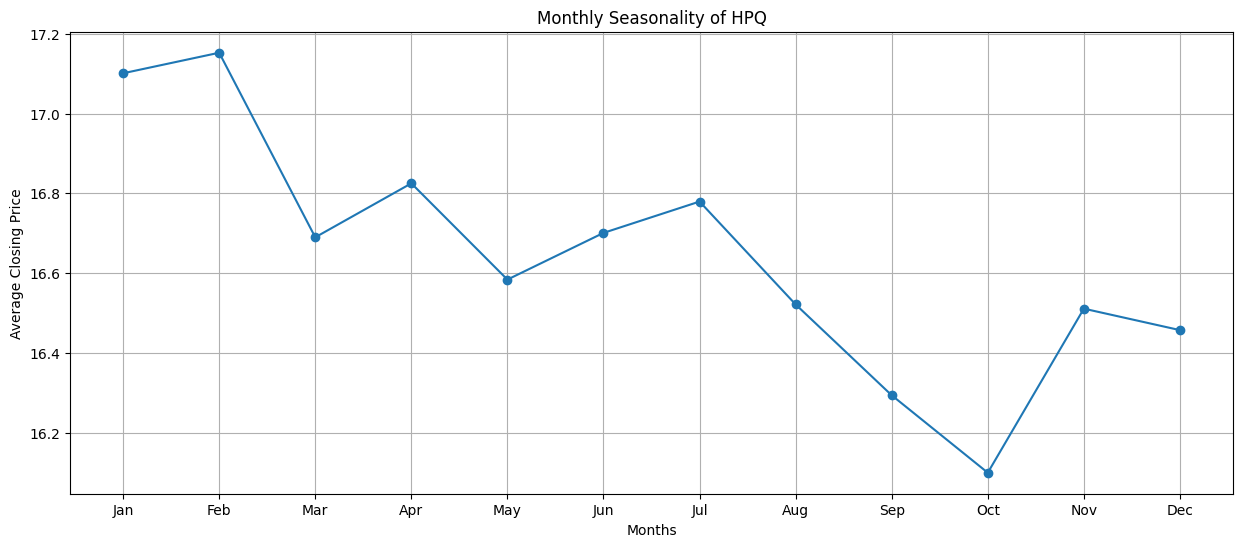

In [ ]:
# Extracting the month from the 'Date' column and creating a new column in the DataFrame
sliced_df['Month'] = sliced_df['Date'].dt.month
# This creates a new column 'Month' in the sliced DataFrame, extracting the month as an integer (1-12) from the 'Date' column.

# Calculating the average closing price for each month
monthly_average = sliced_df.groupby('Month')['Close'].mean()
# This groups the data by the 'Month' column and calculates the mean of the 'Close' prices for each month.
# The result is a Series with months as the index and average closing prices as the values.

# Creating a plot for monthly average closing prices
plt.figure(figsize=(15,6))
# Initializes a new figure with a size of 15x6 inches.

plt.plot(monthly_average.index, monthly_average.values, marker='o')
# Plots the months (index of monthly_average) on the x-axis and their corresponding average closing prices (values of monthly_average) on the y-axis.
# The 'marker' parameter adds a circle marker ('o') at each data point for better visualization.

# Adding a title to the plot
plt.title(f'Monthly Seasonality of HPQ')
# Sets the title for the plot to describe what it represents, specifically focusing on HPQ's monthly seasonality.

# Labeling the x and y axes
plt.xlabel('Months')
# Adds a label to the x-axis indicating the months.

plt.ylabel('Average Closing Price')
# Adds a label to the y-axis indicating the average closing price.

# Setting x-ticks to show month names instead of numbers
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# This sets the x-ticks to range from 1 to 12, labeling them with the corresponding month names.

# Adding grid lines to the plot for better readability
plt.grid(True)
# Adds grid lines to the plot, making it easier to read the values against the axes.

# Displaying the final plot
plt.show()
# Shows the plot with all customizations.

In [ ]:
# Resetting the index of the sliced DataFrame and selecting the 'Close' column

new_df = sliced_df.reset_index()['Close']
# This line resets the index of the 'sliced_df' DataFrame, turning the current index into a regular column.
# Then, it selects the 'Close' column from the resulting DataFrame.
# The result is stored in 'new_df', which is a Series containing the closing prices with a new default integer index.

# Displaying the first few rows of the new DataFrame (or Series)
new_df.head()
# This command shows the first 5 rows (by default) of 'new_df'.
# It's useful for quickly inspecting the values of the 'Close' prices after the index reset.

,Close
0,22.547684
1,22.547684
2,21.285194
3,20.594913
4,19.613987


In [ ]:
# Checking for missing values in the new DataFrame (or Series)

new_df.isnull().sum()
# This command checks for any null (missing) values in 'new_df'.
# 'isnull()' returns a Series of boolean values, where True indicates a null value.
# 'sum()' counts the number of True values, effectively giving the total count of missing values in 'new_df'.
# The result will show how many missing values exist, if any, in the 'Close' prices.

0

In [ ]:
# Importing MinMaxScaler from scikit-learn for data normalization

from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler
scaler = MinMaxScaler()
# This initializes the MinMaxScaler, which will be used to scale the data to a range between 0 and 1.

# Reshaping and scaling the data
scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1, 1))
# The 'new_df' Series is converted to a NumPy array and reshaped to be a 2D array with one column (required by the scaler).
# 'fit_transform()' fits the scaler to the data and then transforms it, scaling the values to a range between 0 and 1.
# The result is stored in 'scaled_data', which contains the normalized values.

# Printing the shape of the scaled data
print('shape of our data >', scaled_data.shape)
# Displays the shape of the 'scaled_data' array, showing the number of rows and columns.

# Displaying the scaled data
scaled_data
# Outputs the scaled data array for inspection, showing the normalized closing prices.

shape of our data > (3084, 1)


array([[0.81649622],
       [0.81649622],
       [0.75666858],
       ...,
       [0.59340554],
       [0.57065901],
       [0.45123964]])

In [ ]:
# Splitting the data into training and testing sets

train_size = int(len(scaled_data) * 0.8)
# Defines the training set size as 80% of the total length of the scaled data.
# 'len(scaled_data)' gives the total number of rows, and multiplying it by 0.8 provides the index where the split between training and testing will occur.
# 'int()' ensures the result is an integer, as indices must be whole numbers.

# Splitting the scaled data into training and testing sets
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
# The first 'train_size' number of samples go into 'train_data' (80% of the data), while the remaining 20% go into 'test_data'.
# This ensures that the training data is used to build the model, and the test data is used for evaluating the model's performance.

# Displaying the number of samples in the training and testing sets
print('train data samples: ', train_data.shape)
# Prints the shape of the 'train_data', showing how many rows and columns it contains (should be 80% of the total samples).

print('test data samples: ', test_data.shape)
# Prints the shape of the 'test_data', showing how many rows and columns it contains (should be 20% of the total samples).

train data samples:  (2467, 1)
test data samples:  (617, 1)


In [ ]:
# Defining the lookback period (window size)
lookback = 90
# This sets a 90-day lookback period, meaning the model will use the past 90 days of data to predict the next day's value.

# Initializing lists for the training set
X_train, y_train = [], []
# 'X_train' will store the input sequences (90-day windows), and 'y_train' will store the corresponding target values (the next day's price).

# Creating the training data with the 90-day lookback
for i in range(lookback, len(train_data)):
    X_train.append(train_data[i - lookback:i, 0])
    # Appends a 90-day sequence of 'Close' prices from the training set to 'X_train'.
    # This takes the data from index (i - lookback) to index i (the previous 90 days).

    y_train.append(train_data[i, 0])
    # Appends the closing price at index i (the next day's price) to 'y_train' as the target output.

# Converting the training data into NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
# Converts the lists into NumPy arrays for easier manipulation, which is necessary for machine learning models.

# Initializing lists for the test set
X_test, y_test = [], []
# 'X_test' will store the input sequences for the test set, and 'y_test' will store the corresponding target values.

# Creating the test data with the 90-day lookback
for i in range(lookback, len(test_data)):
    X_test.append(test_data[i - lookback:i, 0])
    # Appends a 90-day sequence of 'Close' prices from the test set to 'X_test'.

    y_test.append(test_data[i, 0])
    # Appends the closing price at index i (the next day's price) to 'y_test'.

# Converting the test data into NumPy arrays
X_test, y_test = np.array(X_test), np.array(y_test)
# Converts the test set lists into NumPy arrays for easier manipulation and use with machine learning models.

In [ ]:
# Printing the size of the training set
print('Training set size: ')
print(X_train.shape)  # Prints the shape of X_train, which contains the input sequences (90-day windows).
print(y_train.shape)  # Prints the shape of y_train, which contains the corresponding target values (next day's closing price).

# Printing the size of the testing set
print('Testing set size: ')
print(X_test.shape)  # Prints the shape of X_test, which contains the input sequences for the test set.
print(y_test.shape)  # Prints the shape of y_test, which contains the target values for the test set.

Training set size: 
(2377, 90)
(2377,)
Testing set size: 
(527, 90)
(527,)


In [ ]:
# Reshaping the training data for compatibility with neural networks (e.g., LSTM)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# Reshapes 'X_train' into a 3D array with dimensions (samples, timesteps, features).
# 'X_train.shape[0]' is the number of samples (90-day windows).
# 'X_train.shape[1]' is the number of timesteps (90 days of data).
# '1' represents the number of features, since we're working with 1 feature (closing price).

# Reshaping the testing data in the same way
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Similarly, 'X_test' is reshaped to a 3D array for use in models like LSTMs or CNNs that require 3D input.

# Printing the new shape of the training data
print(X_train.shape)
# Displays the shape of the reshaped training data, which should now be (samples, timesteps, features).

# Printing the new shape of the testing data
print(X_test.shape)
# Displays the shape of the reshaped testing data, which should also be (samples, timesteps, features).

(2377, 90, 1)
(527, 90, 1)


In [ ]:
# Importing necessary modules from TensorFlow for building the LSTM model
from tensorflow.keras.models import Sequential
# Sequential is used to create a linear stack of layers in the neural network.

from tensorflow.keras.layers import LSTM, Dense, Dropout
# LSTM: A type of recurrent neural network layer designed for time series and sequential data.
# Dense: A fully connected layer where each neuron is connected to every other neuron in the previous layer.
# Dropout: A regularization technique that randomly "drops" some neurons during training to prevent overfitting.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# ModelCheckpoint: Used to save the best model during training based on validation performance.
# EarlyStopping: Stops training when the performance on the validation set stops improving to prevent overfitting.

from tensorflow.keras.optimizers import SGD
# SGD: Stochastic Gradient Descent optimizer for updating model weights during training.

# Importing metrics from scikit-learn for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# mean_squared_error: Calculates the mean squared error, a common loss function for regression tasks.
# mean_absolute_percentage_error: Measures the percentage error between predicted and actual values.
# r2_score: Provides a measure of how well the predictions match the actual values (R-squared).

In [ ]:
# Initializing the Sequential model
model = Sequential()
# A Sequential model allows you to build a neural network layer by layer.

# Adding the first LSTM layer
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# LSTM layer with 150 units (neurons).
# 'return_sequences=True' ensures the LSTM layer outputs sequences for the next LSTM layer.
# 'input_shape=(X_train.shape[1], 1)' specifies the input shape: (timesteps, features), which is (90, 1) in this case (90-day window and 1 feature).

# Adding Dropout to prevent overfitting
model.add(Dropout(0.2))
# This adds Dropout, which randomly drops 20% of neurons during each update to reduce overfitting.

# Adding a second LSTM layer
model.add(LSTM(units=100, return_sequences=True))
# Another LSTM layer with 100 units (neurons), which still outputs sequences since 'return_sequences=True'.

# Adding Dropout to the second LSTM layer
model.add(Dropout(0.2))
# Another Dropout layer that drops 20% of neurons to prevent overfitting.

# Adding a third LSTM layer
model.add(LSTM(units=50))
# A third LSTM layer with 50 units. Here, 'return_sequences=False' by default, meaning it returns a single output (last timestep) to the next layer.

# Adding Dropout to the third LSTM layer
model.add(Dropout(0.2))
# Another 20% dropout to prevent overfitting in the final LSTM layer.

# Adding the output layer
model.add(Dense(units=1))
# A Dense layer with 1 unit, used for the final output (since we're predicting a single value, i.e., the next day's closing price).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Displaying the model architecture
model.summary()
# This command outputs a summary of the model architecture.
# It shows each layer in the model, its type (LSTM, Dropout, Dense), output shape, number of parameters, and the total number of trainable parameters.
# Useful for verifying the model structure and understanding the number of learnable parameters in each layer.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 90, 150)             │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 90, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 90, 100)             │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,851 (866.61 KB)

 Trainable params: 221,851 (866.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model
model.compile(optimizer=SGD(), loss='mean_squared_error')
# 'optimizer=SGD()' specifies Stochastic Gradient Descent as the optimization algorithm to update the model's weights during training.
# 'loss="mean_squared_error"' defines the loss function as Mean Squared Error (MSE), which is commonly used for regression tasks.
# MSE calculates the average squared difference between the predicted and actual values, helping the model learn to make more accurate predictions.

In [ ]:
# Setting up ModelCheckpoint to save the best model weights during training
checkpoints = ModelCheckpoint(filepath='my_weight.keras', save_best_only=True)
# 'filepath' specifies the location and name of the file where the best model weights will be saved.
# 'save_best_only=True' ensures that only the weights of the best-performing model (based on validation loss) are saved.

# Setting up EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# 'monitor='val_loss'' indicates that the validation loss will be monitored during training.
# 'patience=15' means that training will stop if the validation loss does not improve for 15 consecutive epochs.
# 'restore_best_weights=True' ensures that the model will revert to the weights of the best epoch (lowest validation loss) after stopping.

# Training the model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),  # Using the test data for validation during training
          epochs=100,  # The model will train for up to 100 epochs
          batch_size=32,  # The model will be trained on 32 samples at a time
          verbose=1,  # Setting verbosity to 1 provides detailed output during training
          callbacks=[checkpoints, early_stopping])  # Including the defined callbacks to monitor training

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 302ms/step - loss: 0.0812 - val_loss: 0.0524
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - loss: 0.0260 - val_loss: 0.0333
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0156 - val_loss: 0.0210
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - loss: 0.0078 - val_loss: 0.0094
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0055 - val_loss: 0.0065
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 292ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0041 - val_loss: 0.0048
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 313ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 12/100
75/75 ━━━━━━━━━━━

In [ ]:
# Making predictions on the training dataset
train_predict = model.predict(X_train)
# The model predicts the target values for the training data (X_train).
# 'train_predict' will contain the predicted closing prices for the training set.

# Making predictions on the testing dataset
test_predict = model.predict(X_test)
# The model predicts the target values for the testing data (X_test).
# 'test_predict' will contain the predicted closing prices for the testing set.

75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step


In [ ]:
# Displaying the first five predictions from the test dataset
test_predict[0:5]
# This command retrieves and shows the first five predicted values from the 'test_predict' array.
# It allows you to quickly inspect the model's predictions for the initial samples in the test dataset.

array([[0.770362  ],
       [0.77119786],
       [0.773306  ],
       [0.7765083 ],
       [0.78061986]], dtype=float32)

In [ ]:
# Inversely transforming the training predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
# This line applies the inverse transformation of the MinMaxScaler to convert the scaled predictions
# back to the original closing price scale.
# 'train_predict' now contains the predicted closing prices in their original units.

# Inversely transforming the testing predictions back to original scale
test_predict = scaler.inverse_transform(test_predict)
# Similar to the previous line, this applies the inverse transformation to the test predictions.
# 'test_predict' now contains the predicted closing prices in their original units.

In [ ]:
# Displaying the first five predictions from the test dataset after inverse transformation
test_predict[0:5]
# This command retrieves and shows the first five predicted values from the 'test_predict' array
# after transforming them back to the original scale.
# This allows you to inspect the model's predictions in their original monetary values.

array([[21.574156],
       [21.591793],
       [21.63628 ],
       [21.703854],
       [21.790617]], dtype=float32)

In [ ]:
# Reshaping the training target values for inverse transformation
y_train = y_train.reshape(-1, 1)
# Reshaping 'y_train' to a 2D array with one column, which is required for the scaler's inverse transformation.

# Reshaping the testing target values for inverse transformation
y_test = y_test.reshape(-1, 1)
# Similarly reshaping 'y_test' to a 2D array with one column for the inverse transformation.

# Inversely transforming the training target values back to original scale
y_train = scaler.inverse_transform(y_train)
# Applying the inverse transformation to convert the scaled target values back to their original scale.
# 'y_train' now contains the actual closing prices for the training dataset.

# Inversely transforming the testing target values back to original scale
y_test = scaler.inverse_transform(y_test)
# Similar to the previous line, this converts the scaled test target values back to their original scale.
# 'y_test' now contains the actual closing prices for the testing dataset.

In [ ]:
# Displaying the first five actual target values from the training dataset after inverse transformation
y_train[0:5]
# This command retrieves and shows the first five actual closing prices from the 'y_train' array
# after they have been transformed back to the original scale.
# This allows you to inspect the true values for the training dataset in their original monetary values.

array([[21.26703072],
       [20.10445023],
       [20.72661209],
       [21.22161674],
       [21.47593117]])

In [ ]:
# Calculating and printing the Root Mean Squared Error (RMSE) for the training dataset
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
# 'mean_squared_error(y_train, train_predict)' computes the Mean Squared Error between the actual values (y_train)
# and the predicted values (train_predict).
# 'math.sqrt()' takes the square root of the MSE to obtain the RMSE, which provides a measure of prediction error in the same units as the target variable.

print(train_rmse)  # Outputting the RMSE for the training dataset

# Calculating and printing the Root Mean Squared Error (RMSE) for the testing dataset
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
# Similarly, this calculates the RMSE for the testing dataset using the actual values (y_test)
# and the predicted values (test_predict).

print(test_rmse)  # Outputting the RMSE for the testing dataset

0.893415133540866
1.3578720477271196


In [ ]:
# Calculating and printing the Mean Absolute Percentage Error (MAPE) for the training dataset
train_mape = mean_absolute_percentage_error(y_train, train_predict)
# This function calculates the Mean Absolute Percentage Error between the actual values (y_train)
# and the predicted values (train_predict).
# MAPE expresses the prediction error as a percentage, making it easier to interpret.

print(train_mape)  # Outputting the MAPE for the training dataset

# Calculating and printing the Mean Absolute Percentage Error (MAPE) for the testing dataset
test_mape = mean_absolute_percentage_error(y_test, test_predict)
# Similar to the previous line, this calculates the MAPE for the testing dataset using the actual values (y_test)
# and the predicted values (test_predict).

print(test_mape)  # Outputting the MAPE for the testing dataset

0.049467703581972056
0.048263442991768345


In [ ]:
# Calculating and printing the R-squared score for the training dataset
train_r2 = r2_score(y_train, train_predict)
# This function computes the R-squared score, which measures the proportion of variance
# in the actual values (y_train) that is predictable from the predicted values (train_predict).
# An R-squared score of 1 indicates perfect prediction, while a score of 0 indicates no predictive power.

print(train_r2)  # Outputting the R-squared score for the training dataset

# Calculating and printing the R-squared score for the testing dataset
test_r2 = r2_score(y_test, test_predict)
# Similarly, this calculates the R-squared score for the testing dataset using the actual values (y_test)
# and the predicted values (test_predict).

print(test_r2)  # Outputting the R-squared score for the testing dataset

0.9562212523521113
0.6591346034040317


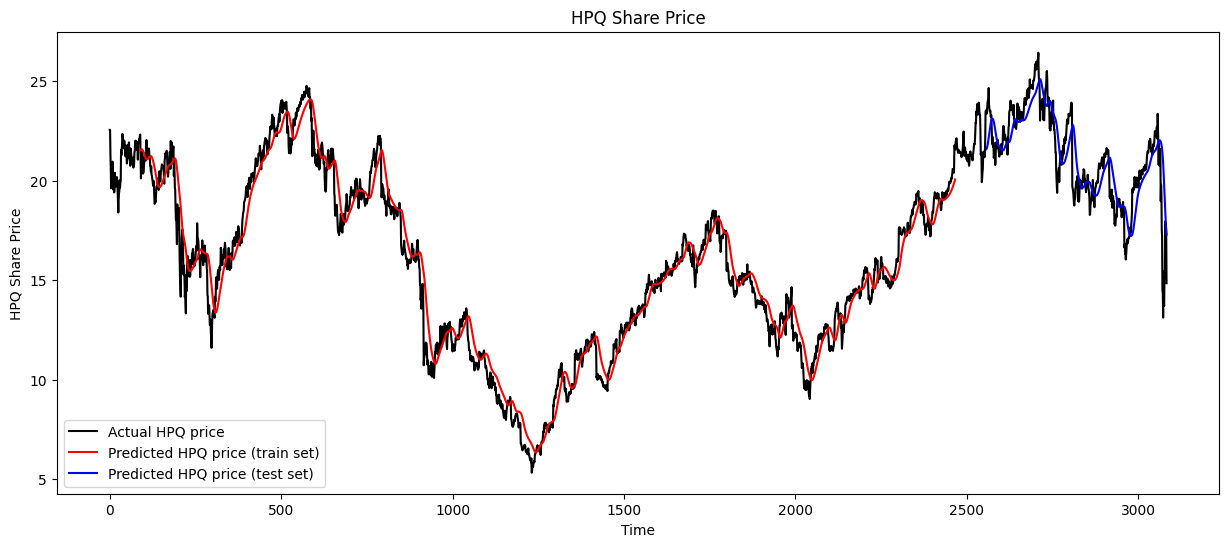

In [ ]:
# Setting the lookback period for the predictions
look_back = 90

# Preparing an empty array to hold training predictions aligned with the original dataset
trainPredictPlot = np.empty_like(new_df)
# Creating an array of the same shape as 'new_df' to store training predictions.
# This will be used for plotting later.

trainPredictPlot[:] = np.nan  # Initializing the array with NaN values
# Filling the array with NaN values to keep track of the positions for valid predictions.

# Filling the training predictions into the appropriate positions in the plot array
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()
# Aligning the training predictions with the original dataset by offsetting by 'look_back' days.

# Preparing an empty array to hold testing predictions aligned with the original dataset
testPredictPlot = np.empty_like(new_df)
# Similar to 'trainPredictPlot', this creates an array to store test predictions.

testPredictPlot[:] = np.nan  # Initializing the array with NaN values
# Initializing with NaN values to maintain structure for valid predictions.

# Determining the starting index for the test predictions in the plot array
test_start = len(new_df) - len(test_predict)
# This calculates where the test predictions will start in the array based on the length of 'new_df'.

# Filling the testing predictions into the appropriate positions in the plot array
testPredictPlot[test_start:] = test_predict.flatten()
# Aligning the test predictions with the original dataset, starting from the calculated index.

# Inversely transforming the scaled data to get the original values for plotting
original_scaled_data = scaler.inverse_transform(scaled_data)

# Creating a plot to visualize actual and predicted prices
plt.figure(figsize=(15, 6))  # Setting the figure size for better visibility
plt.plot(original_scaled_data, color='black', label="Actual HPQ price")
# Plotting the actual HPQ prices in black.

plt.plot(trainPredictPlot, color='red', label="Predicted HPQ price (train set)")
# Plotting the predicted prices for the training set in red.

plt.plot(testPredictPlot, color='blue', label="Predicted HPQ price (test set)")
# Plotting the predicted prices for the testing set in blue.

# Adding titles and labels to the plot
plt.title("HPQ Share Price")
plt.xlabel('Time')
plt.ylabel("HPQ Share Price")
plt.legend()  # Adding a legend to differentiate the lines
plt.show()  # Displaying the plot

# **Arima**

In [ ]:
# Calculating the size of the training data (80% of the dataset)
train_size = int(len(scaled_data) * 0.8)
# 'len(scaled_data)' gives the total number of samples in the dataset.
# Multiplying by 0.8 ensures that 80% of the data is allocated for training.

# Splitting the dataset into training and testing sets
train, test = scaled_data[:train_size], scaled_data[train_size:]
# 'train' contains the first 80% of the data, and 'test' contains the remaining 20%.

# Printing the shape (number of rows and columns) of the training data
print('Train data samples: ', train.shape)
# This helps verify the number of samples allocated to the training set.

# Printing the shape (number of rows and columns) of the testing data
print('Test data samples: ', test.shape)
# This helps verify the number of samples allocated to the testing set.

Train data samples:  (2467, 1)
Test data samples:  (617, 1)


In [ ]:
# Importing the Augmented Dickey-Fuller (ADF) test function
from statsmodels.tsa.stattools import adfuller

# Applying the ADF test to the 'train' data (which should be your training set for time series)
result = adfuller(train)
# 'adfuller()' function performs the ADF test, which tests for stationarity in a time series.
# It returns several values, including the ADF statistic, p-value, and critical values.

# Printing the ADF test statistic
print(f'ADF Statistic: {result[0]}')
# The ADF Statistic is a number used to determine whether the time series is stationary or not.

# Printing the p-value of the ADF test
print(f'p-value: {result[1]}')
# The p-value indicates the probability that the time series is non-stationary.
# Typically, a p-value < 0.05 suggests stationarity.

# Printing the critical values for different significance levels
print('Critical values:')
# Critical values are thresholds for the ADF statistic at various confidence levels
# (e.g., 1%, 5%, 10%) to help determine stationarity.

for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
# Looping through the critical values and printing them for 1%, 5%, and 10% levels.

ADF Statistic: -1.530270319608428
p-value: 0.5184874623708561
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [ ]:
# Importing necessary libraries
import pandas as pd  # Library for data manipulation and analysis
from statsmodels.tsa.stattools import adfuller  # Importing the Augmented Dickey-Fuller test function

# Assuming 'train' is a NumPy array with shape (2467, 1)
# Flatten the array to convert it to 1D for analysis
train_flattened = train.ravel()  # 'ravel()' returns a contiguous flattened array
# Alternatively, you can use 'train.flatten()' which also flattens the array.

# Convert the flattened array to a Pandas Series
train = pd.Series(train_flattened)
# Converting to a Pandas Series allows for easier data manipulation and analysis.

# Perform differencing to remove trends and make the time series stationary
differenced = train.diff().dropna()
# 'diff()' calculates the difference between consecutive elements, effectively removing trends.
# 'dropna()' removes any NaN values that arise from the differencing.

# Perform the Augmented Dickey-Fuller (ADF) test on the differenced data
result = adfuller(differenced)

# Print the ADF statistic for the differenced data
print(f'ADF Statistic (Differenced): {result[0]}')
# The ADF statistic indicates how strongly we can reject the null hypothesis of non-stationarity.

# Print the p-value for the differenced data
print(f'p-value (Differenced): {result[1]}')
# A p-value < 0.05 suggests that the differenced data is stationary.

# Print the critical values for different significance levels (1%, 5%, 10%)
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
# Critical values help to determine if the ADF statistic indicates stationarity.
# If the ADF statistic is less than these critical values, we can reject the null hypothesis.

ADF Statistic (Differenced): -23.960092847772998
p-value (Differenced): 0.0
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


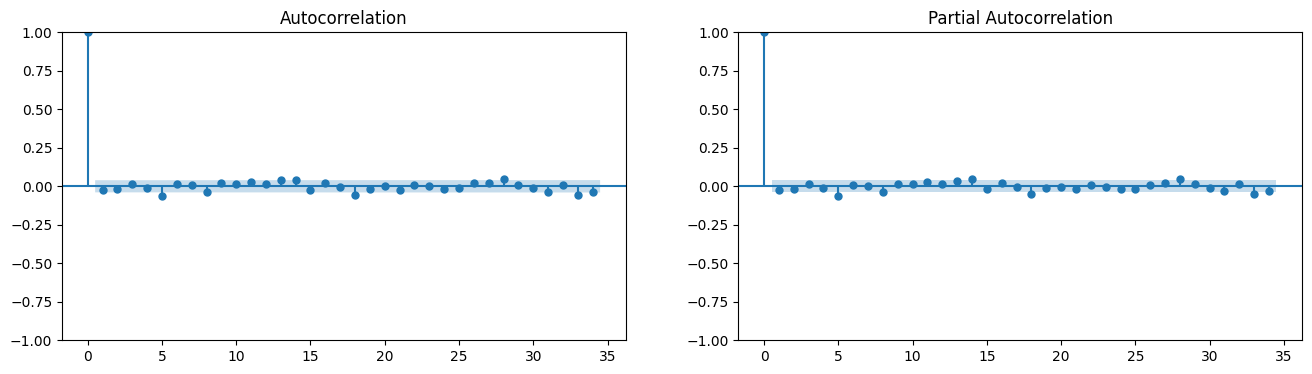

In [ ]:
# Importing necessary libraries for plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Plotting the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
# Creating a figure with 1 row and 2 columns of subplots, and setting the figure size

# Plotting the ACF on the first subplot
plot_acf(differenced, ax=axes[0])
# The ACF plot shows the correlation between a time series and its lagged values.
# It helps identify the potential presence of autocorrelation at various lags.

# Plotting the PACF on the second subplot
plot_pacf(differenced, ax=axes[1])
# The PACF plot shows the correlation between a time series and its lagged values, controlling for the values of the time series at shorter lags.
# It is useful for identifying the order of the AR (AutoRegressive) part of an ARIMA model.

# Display the plots
plt.show()

# **Arima Model**

In [ ]:
# Importing the ARIMA model from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Setting the parameters for the ARIMA model
p = 1  # Order of the AR (AutoRegressive) part, determined from the PACF plot
d = 1  # Order of differencing, set to 1 as we have differenced the series once to achieve stationarity
q = 1  # Order of the MA (Moving Average) part, determined from the ACF plot

# Building the ARIMA model with the specified order
model = ARIMA(train, order=(p, d, q))
# 'train' is the stationary time series data on which the model will be fitted.

# Fitting the ARIMA model to the training data
model_fit = model.fit()
# This step estimates the model parameters using the maximum likelihood estimation method.

# Printing the summary of the fitted model
print(model_fit.summary())
# The summary provides details about the model's parameters, statistical significance,
# and goodness of fit measures, such as AIC and BIC, which can help in model evaluation.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2467
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6845.867
Date:                Thu, 26 Sep 2024   AIC                         -13685.733
Time:                        16:10:08   BIC                         -13668.302
Sample:                             0   HQIC                        -13679.400
                               - 2467                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1616      0.532      0.304      0.761      -0.881       1.204
ma.L1         -0.1897      0.527     -0.360      0.719      -1.223       0.844
sigma2         0.0002   2.91e-06     78.079      0.0

In [ ]:
# Make predictions on the test data
history = list(train)  # Convert training data into a list for updating with new observations
predictions = []  # Initialize an empty list to store the predictions

# Loop through each time step in the test data
for t in range(len(test)):
    # Create and fit the ARIMA model on the updated history
    model = ARIMA(history, order=(p, d, q))  # Re-fitting the ARIMA model with the current history
    model_fit = model.fit()  # Fitting the model to the historical data

    # Making a one-step-ahead forecast
    yhat = model_fit.forecast()[0]  # Forecast returns an array, [0] extracts the first value (the next predicted observation)
    predictions.append(yhat)  # Append the predicted value to the predictions list

    # If test is a DataFrame or 2D array, extract a scalar value (e.g., the first element of each row)
    actual_value = test[t][0] if isinstance(test[t], (list, np.ndarray)) else test[t]

    # Update the history with the actual scalar value from the test set
    history.append(actual_value)  # Add the actual observation to the history for future predictions

# Display the predictions
predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

[0.7694544528199021,
 0.7770891681952893,
 0.7882954796094137,
 0.7913498382877291,
 0.7960724120220984,
 0.7883715384407708,
 0.7753084103177571,
 0.7680622935233392,
 0.7669201712746586,
 0.7617915335875232,
 0.769034050925029,
 0.7654998822067269,
 0.7640568504068801,
 0.765395724514912,
 0.7640388870488293,
 0.7612461474101149,
 0.7630187585305818,
 0.7593646228372269,
 0.7542146364564953,
 0.7513161640648757,
 0.759981825907321,
 0.760173476938112,
 0.7698816334958916,
 0.778411882446547,
 0.7957034025472507,
 0.8118312302876973,
 0.760664482542029,
 0.7549182568419438,
 0.7550627418485705,
 0.7739094668241585,
 0.7637172367065264,
 0.764494502203298,
 0.7626400720195843,
 0.7473973149767804,
 0.7465852690039814,
 0.7441935101829585,
 0.741818832430777,
 0.7463569264984986,
 0.7570395458443631,
 0.742560163512258,
 0.736297666852792,
 0.7310357530723693,
 0.7391698050050054,
 0.7563629876379679,
 0.7627632887480349,
 0.7648321760728598,
 0.7552469827813643,
 0.7555202045538564,
 0

In [ ]:
# Import the mean_squared_error function from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions))
# mean_squared_error calculates the average of the squared differences between actual and predicted values.
# np.sqrt takes the square root of this value to return the RMSE.

# Print the RMSE value
print(f'RMSE: {rmse}')
# This output gives an indication of how well the model's predictions match the actual values.
# Lower RMSE values indicate better model performance.

RMSE: 0.022032941728548527


In [ ]:
# Import the mean_absolute_percentage_error function from sklearn.metrics
from sklearn.metrics import mean_absolute_percentage_error

# Calculate and print the Mean Absolute Percentage Error (MAPE) for the test data
print("MAPE: ", mean_absolute_percentage_error(test, predictions))
# The mean_absolute_percentage_error function computes the average of the absolute percentage errors
# between the actual values (test) and the predicted values (predictions).
# This metric expresses accuracy as a percentage, which is useful for understanding the relative error.

MAPE:  0.018878733860171228


In [ ]:
# Import the r2_score function from sklearn.metrics
from sklearn.metrics import r2_score

# Calculate and print the R² score for the test data
print("R2 score: ", r2_score(test, predictions))
# The r2_score function computes the coefficient of determination, which indicates how well the predicted values
# explain the variability of the actual values (test).
# R² values range from 0 to 1, where higher values indicate better model performance.

R2 score:  0.9546880464794301


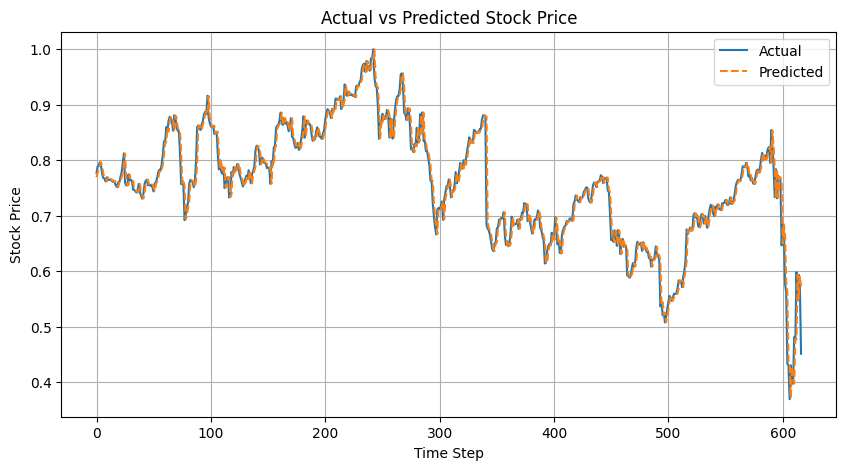

In [ ]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(10, 5))

# Use range(len(test)) for the x-axis, as test is a NumPy array without an index
plt.plot(range(len(test)), test, label='Actual')

# Plot the predicted stock prices with a dashed line
plt.plot(range(len(test)), predictions, label='Predicted', linestyle='--')

# Label the x-axis as 'Time Step' (since we don't have dates)
plt.xlabel('Time Step')

# Label the y-axis as 'Stock Price'
plt.ylabel('Stock Price')

# Set the title of the plot
plt.title('Actual vs Predicted Stock Price')

# Add a legend to differentiate between actual and predicted prices
plt.legend()

# Enable the grid for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()
